In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics


In [37]:
weather_data=pd.read_csv('weatherHistory.csv')

In [38]:
weather_data

,Formatted Date,Summary,PrecipType,Temperature,ApparentTemperature,Humidity,WindSpeed(km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),DailySummary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.


# First Model using linear regression

In [39]:
weather_data = weather_data.drop_duplicates()
weather_data = weather_data.fillna(method='ffill')

In [40]:
weather_data

,Formatted Date,Summary,PrecipType,Temperature,ApparentTemperature,Humidity,WindSpeed(km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),DailySummary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.


In [41]:
X = weather_data[['Temperature', 'ApparentTemperature', 'Humidity',]]
y = weather_data['WindSpeed(km/h)']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [44]:
temp=input("Enter temperature in celcius : ")
Atemp=input("Enter ApparentTemperature in celcius: ") 
Humidity=input("Enter Humidity ")
new_data = pd.DataFrame({'Temperature': [temp], 'ApparentTemperature': [Atemp],'Humidity': [Humidity]})
prediction = reg_model.predict(new_data)
print('Predicted WindSpeed is -:', prediction,"Km/h")

Enter temperature in celcius : 39
Enter ApparentTemperature in celcius: 12
Enter Humidity 0.8
Predicted WindSpeed is -: [85.74920865] Km/h


In [45]:

y_pred = reg_model.predict(X_test)
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
MAE=mean_absolute_error(y_test,y_pred)
R2_Score=r2_score(y_test,y_pred)

print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)
print("Accuracy:",R2_Score)

MSE: 33.04097850732672
RMSE: 5.748128261210489
MAE: 4.166036138508498
Accuracy: 0.3071245416330397


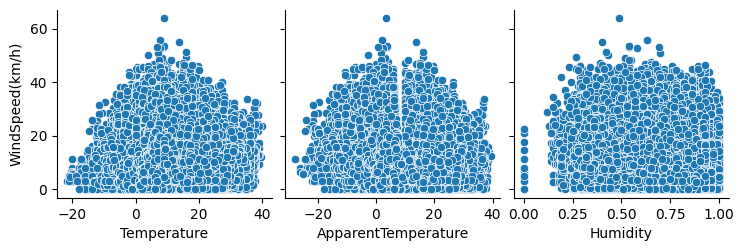

In [46]:
sns.pairplot(weather_data, x_vars=['Temperature', 'ApparentTemperature', 'Humidity'], y_vars=['WindSpeed(km/h)'])
plt.show()

# Second model using polynomial regression

In [52]:

# Select the input features and target variable
X = weather_data[['ApparentTemperature', 'Humidity', 'WindSpeed(km/h)']]
y = weather_data['Temperature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the input data using polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


In [53]:
# Fit a linear regression model to the transformed data
reg_model = LinearRegression()
reg_model.fit(X_train_poly, y_train)

LinearRegression()

In [60]:
# Make a prediction for a new data point
temp = float(input("Enter Apparent Temperature in celcius: "))
Atemp = float(input("Enter Humidity in celcius: ")) 
Humidity = float(input("Enter windspeed in (km/h): "))
new_data = pd.DataFrame({'Temperature': [temp], 'ApparentTemperature': [Atemp], 'Humidity': [Humidity]})
new_data_poly = poly.fit_transform(new_data)
prediction = reg_model.predict(new_data_poly)
print('Predicted Temperature is:', prediction[0], "celcius")

Enter Apparent Temperature in celcius: 28
Enter Humidity in celcius: 0.5
Enter windspeed in (km/h): 10
Predicted Temperature is: 27.928509794088423 celcius


In [61]:

y_pred = reg_model.predict(X_test_poly)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
R2_Score = r2_score(y_test, y_pred)

print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAE:", MAE)
print("R2 Score:", R2_Score)

MSE: 0.32276576502888604
RMSE: 0.5681247794533223
MAE: 0.4256172904827552
R2 Score: 0.9964800199624115


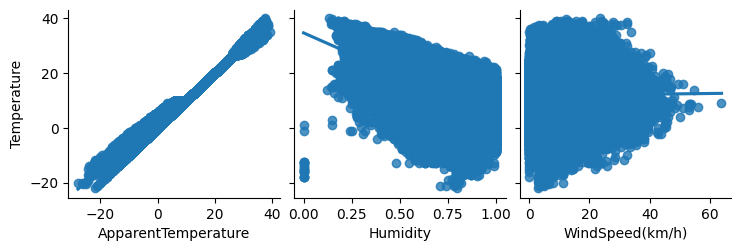

In [62]:

# Visualize the relationship between the input features and target variable
sns.pairplot(weather_data, x_vars=['ApparentTemperature', 'Humidity', 'WindSpeed(km/h)'], y_vars=['Temperature'], kind='reg')
plt.show()


# Third model using decision tree classifier

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
PrecipType=LabelEncoder()

In [68]:
weather_data['PrecipType']=PrecipType.fit_transform(weather_data['PrecipType'])

In [69]:
features_cols=['Temperature','Humidity','WindSpeed(km/h)']
Xi=weather_data[features_cols]
yi=weather_data.PrecipType

In [70]:
Xi

,Temperature,Humidity,WindSpeed(km/h)
0,9.472222,0.89,14.1197
1,9.355556,0.86,14.2646
2,9.377778,0.89,3.9284
3,8.288889,0.83,14.1036
4,8.755556,0.83,11.0446
...,...,...,...
96448,26.016667,0.43,10.9963
96449,24.583333,0.48,10.0947
96450,22.038889,0.56,8.9838
96451,21.522222,0.60,10.5294


In [71]:
yi

0        0
1        0
2        0
3        0
4        0
        ..
96448    0
96449    0
96450    0
96451    0
96452    0
Name: PrecipType, Length: 96429, dtype: int32

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
Xtrain, X_test, y_train, y_test = train_test_split(Xi, yi, test_size=0.2)

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
classifier=DecisionTreeClassifier(criterion="gini")

In [76]:
classifier.fit(Xtrain,y_train)

DecisionTreeClassifier()

In [88]:
a=classifier.predict(X_test)
predictions_df = pd.DataFrame(a, columns=['PrecipType'])

In [89]:
predictions_df

,PrecipType
0,0
1,0
2,0
3,0
4,1
...,...
19281,0
19282,0
19283,0
19284,0


In [90]:
classifier.score(X_test,y_test)

1.0

[Text(0.5, 0.75, 'x[0] <= 0.003\ngini = 0.198\nsamples = 77143\nvalue = [68569, 8574]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 8574\nvalue = [0, 8574]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 68569\nvalue = [68569, 0]')]

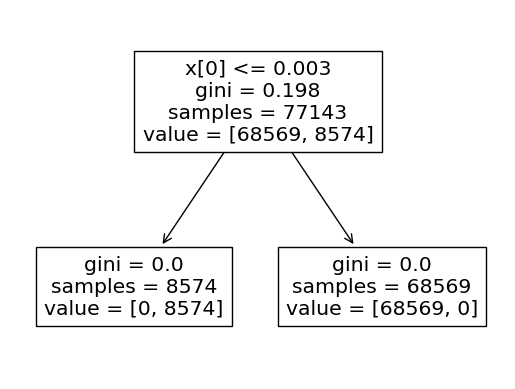

In [91]:
from sklearn import tree
tree.plot_tree(classifier)

# 4th Model using linear regression

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

In [106]:
weather_data["target"] = weather_data.shift(-1)["Temperature"]

In [107]:
weather_data

,Formatted Date,Summary,PrecipType,Temperature,ApparentTemperature,Humidity,WindSpeed(km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),DailySummary,WindSpeedCategory,target
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,10-20,9.355556
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,10-20,9.377778
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,0-10,8.288889
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,10-20,8.755556
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,10-20,9.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,0,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.,10-20,24.583333
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,0,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.,10-20,22.038889
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,0,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.,0-10,21.522222
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,0,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.,10-20,20.438889


In [126]:
reg = LinearRegression()
predictors = ["Temperature", "Humidity", "WindSpeed(km/h)"]
train = weather_data.loc[:"2012-12-31"]
test = weather_data.loc["2015-01-01":]


In [127]:
reg.fit(train[predictors],train["target"])

LinearRegression()

In [128]:
predictions = reg.predict(test[predictors])

In [129]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]


In [130]:
combined

,actual,predictions
20150,17.266667,16.788511
20151,16.161111,16.858467
20152,14.000000,15.802894
20153,11.250000,13.675940
20154,10.277778,11.031265
...,...,...
96448,24.583333,25.712944
96449,22.038889,24.331026
96450,21.522222,21.868741
96451,20.438889,21.388954


<AxesSubplot: >

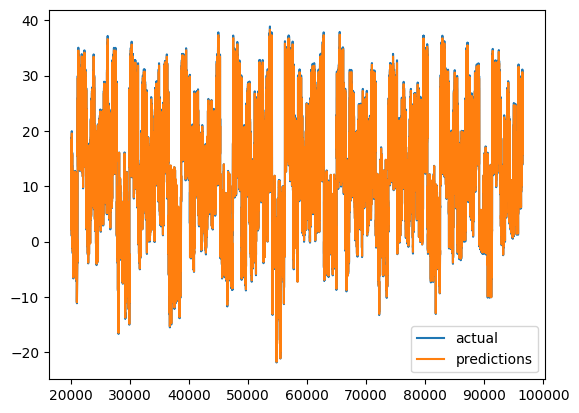

In [131]:
combined.plot()

# Project Ended Thankyou